In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [9]:
url = 'https://www.tennis.com/rankings/ATP/'
response = requests.get(url)
soup = BeautifulSoup(response.text)

In [16]:
table = soup.find_all('table')
df = pd.read_html(str(table))[0]

In [18]:
df['COUNTRY'] = df['COUNTRY'].str.replace('Usa', 'United States')

In [19]:
by_nation = df.groupby(by=['COUNTRY'])['RANKING POINTS'].sum()

In [20]:
by_nation = by_nation.sort_values(ascending=False)

In [25]:
top_ten = by_nation[:10]
x = top_ten.index
y = top_ten.values

<AxesSubplot:xlabel='COUNTRY'>

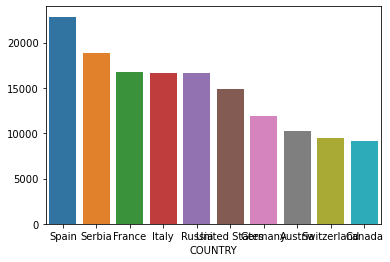

In [26]:
sns.barplot(x=x,y=y)